METODE INTERPOLASI NEWTON


Algoritma Penyelesaian menggunakan Pseudo code

function Newton(x:real; n:integer):real;
{Menghitung y = p(x), dengan p(x) adalah polinom Newton derajat n.
Titik-titik data telah disimpan di dalam larik x[0..n] dan y[0..n]
}
var
i, k : integer;
ST : array[0..30, 0..30] of real; {menyimpan tabel selisih terbagi}
jumlah, suku: real;
begin
for k:=0 to n do { simpan y[k] pada kolom 0 dari matriks ST }
ST[k,0]:=y[k];
{end for}
for k:=1 to n do {buat tabel selisih terbagi}
for i:=0 to n-k do
ST[i,k]:=(ST[i+1,k-1] - ST[i,k-1])/(x[i+k]-x[i]);
{end for}
{end for}
{hitung p(x) }
jumlah:=ST[0,0];
for i:=1 to n do
begin
suku:=ST[0,i];
for k:=0 to i-1 do
suku:=suku*(x-x[k])
{end for}
jumlah:=jumlah + suku;
end;
Newton:=jumlah;
end;

PROGRAM INTERPOLASI NEWTON STATIS DILENGKAPI DENGAN GRAFIK

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2628\3831527558.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


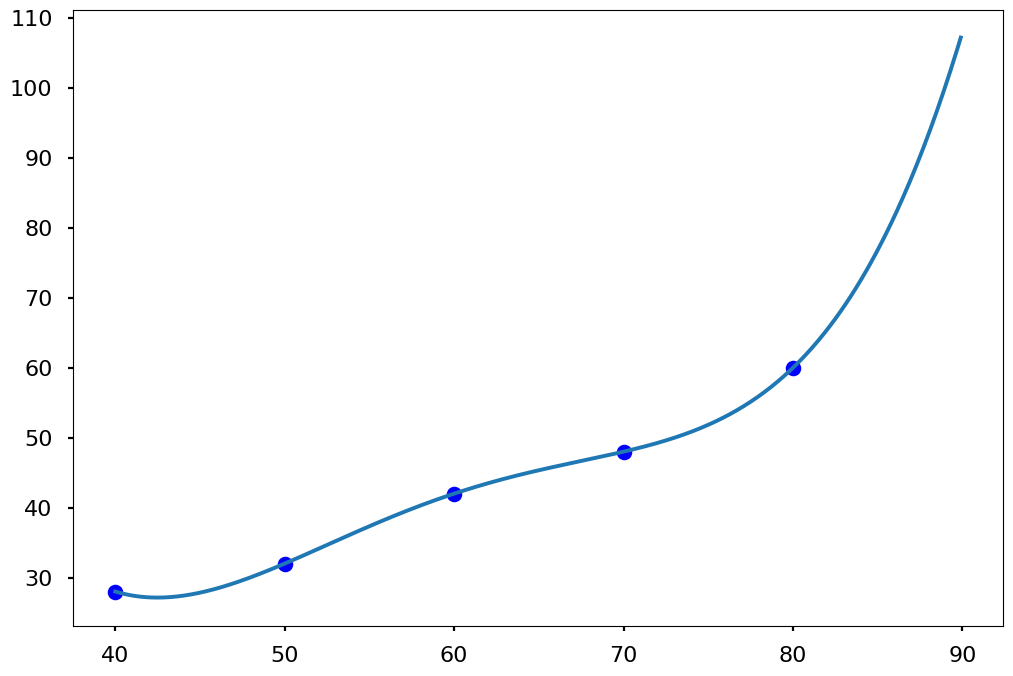

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):
    '''
    Fungsi untuk menghitung tabel selisih-terbagi
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    Evaluasi polinom Newton di x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([40, 50, 60, 70, 80])
y = np.array([28, 32, 42, 48, 60])
# Mendapatkan koefisien selisih terbagi
a_s = divided_diff(x, y)[0, :]

# Evaluasi di titik data baru
x_new = np.arange(40, 90.0, .100)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

BEDA MUNDUR NEWTON INTERPOLASI

In [28]:
# PROGRAM BEDA MUNDUR INTERPOLASI NEWTON

import numpy as np
import sys

n = int(input('Masukan jumah titik data: '))

x = np.zeros((n))
y = np.zeros((n, n))

print('Masukan data untuk masing-masing x dan y: ')
for i in range(n):
    x[i] = float(input('x[' + str(i) + ']='))
    y[i][0] = float(input('y[' + str(i) + ']='))

for i in range(1, n):
    for j in range(n - 1, i - 2, -1):
        y[j][i] = y[j][i - 1] - y[j - 1][i - 1]

print('\nTABEL SELISIH BEDA MUNDUR\n');

for i in range(0, n):
    print('%0.2f' % (x[i]), end='')
    for j in range(0, i + 1):
        print('\t%0.2f' % (y[i][j]), end='')
    print()

Masukan data untuk masing-masing x dan y: 

TABEL SELISIH BEDA MUNDUR

40.00	28.00
50.00	32.00	4.00
60.00	42.00	10.00	6.00
70.00	48.00	6.00	-4.00	-10.00
80.00	60.00	12.00	6.00	10.00	20.00


BEDA MAJU NEWTON INTERPOLASI

In [1]:
# PROGRAM BEDA MUNDUR INTERPOLASI NEWTON

import numpy as np

n = int(input('Masukan jumlah titik data: '))

x = np.zeros((n))
y = np.zeros((n, n))

print('Masukan data untuk masing-masing x dan y: ')
for i in range(n):
    x[i] = float(input('x[' + str(i) + ']='))
    y[i][0] = float(input('y[' + str(i) + ']='))

for i in range(1, n):
    for j in range(0, n - i):
        y[j][i] = y[j + 1][i - 1] - y[j][i - 1]

print('\nTABEL SELISIH BEDA MAJU\n');

for i in range(0, n):
    print('%0.2f' % (x[i]), end='')
    for j in range(0, n - i):
        print('\t\t%0.2f' % (y[i][j]), end='')
    print()

Masukan data untuk masing-masing x dan y: 

TABEL SELISIH BEDA MUNDUR

1.00		10.00		10.00		0.00
2.00		20.00		10.00
3.00		30.00


INTERPOLASI METODE NEWTON DINAMIS

Masukan data x dan y: 

============================================TABEL SELISIH - TERBAGI==============================================
40.00		28.000000		0.400000		0.030000		-0.001667		0.000083
50.00		32.000000		1.000000		-0.020000		0.001667
60.00		42.000000		0.600000		0.030000
70.00		48.000000		1.200000
80.00		60.000000
Nilai hampiran dari data di atas adalah 45.343750


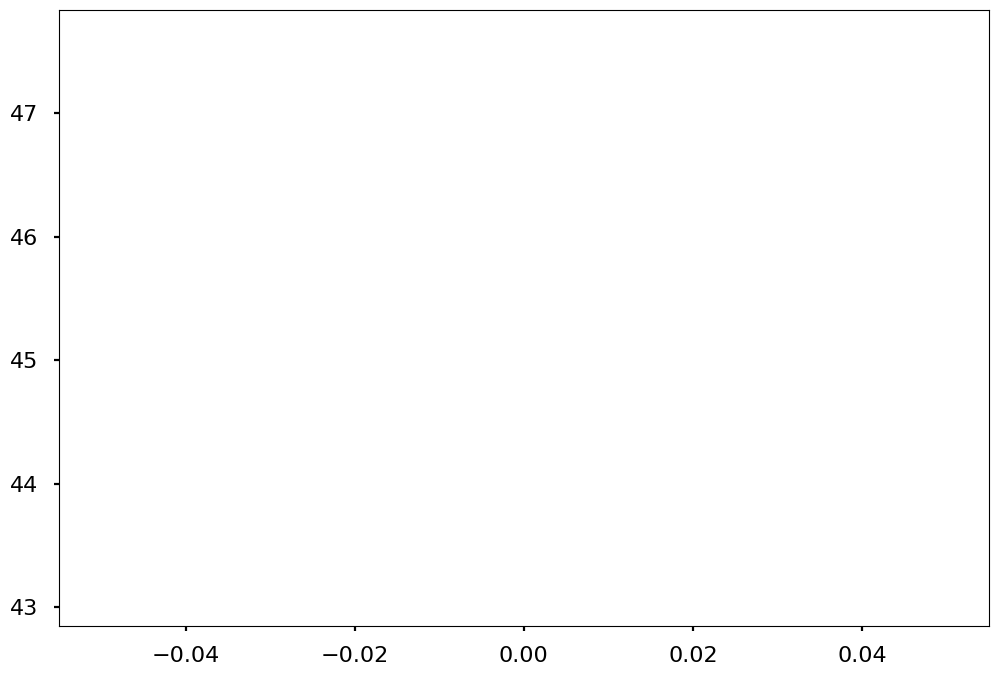

In [27]:
import numpy as np
import matplotlib.pyplot as plt


n = int(input('Masukan jumlah inputan data x dan y: '))
x = np.zeros((n))
y = np.zeros((n, n))


print('Masukan data x dan y: ')
for i in range(n):
    x[i] = float(input('x(' + str(i) + ') = '))
    y[i][0] = float(input('y(' + str(i) + ') = '))
    

xinput = input('Masukkan nilai x yang ingin diketahui: ')
xinput = float(xinput)

for i in range(1, n):
    for j in range(0, n-i):
        y[j][i] = (y[j + 1, i - 1] - y[j, i - 1])/(x[j+i] - x[j])

print('\n============================================TABEL SELISIH - TERBAGI==============================================');
for i in range(0, n):
    print('%0.2f' % (x[i]), end='')
    for j in range(0, n - i):
        print('\t\t%0.6f' % (y[i][j]), end='')
    print()
print('=================================================================================================================');

p = y[0,0]
for i in range (1, n):
    a = y[0,i]
    for j in range(0, i):
        a = a * (xinput-x[j])
    p = p+a
print('Nilai hampiran dari data di atas adalah %0.6f' % p)



PROGRAM INTERPOLASI NEWTON STATIS DENGAN GRAFIK POLINOM

Text(0.5, 1.0, 'Contoh penyelesaian polinom Newtons')

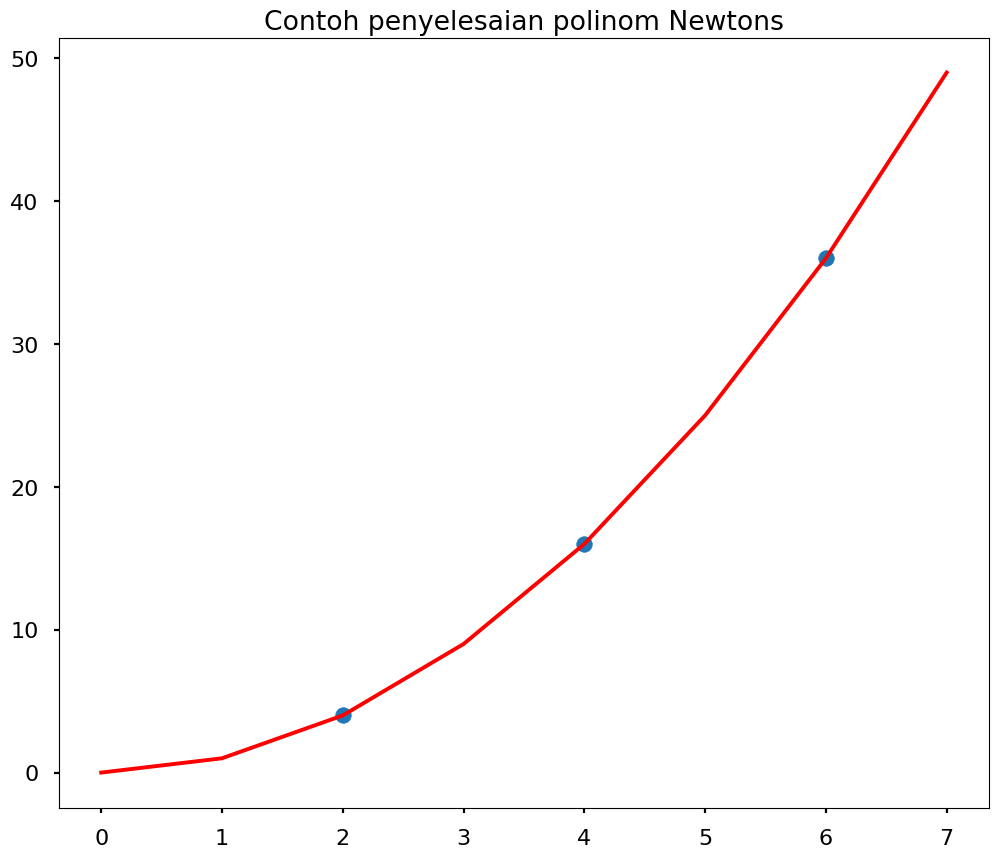

In [12]:

def _poly_newton_coefficient(x, y):    

    m = len(x)

    x = np.copy(x)
    a = np.copy(y)
    for k in range(1, m):
        a[k:m] = (a[k:m] - a[k - 1])/(x[k:m] - x[k - 1])

    return a

def newton_polynomial(x_data, y_data, x):
 
    a = _poly_newton_coefficient(x_data, y_data)
    n = len(x_data) - 1  
    p = a[n]

    for k in range(1, n + 1):
        p = a[n - k] + (x - x_data[n - k])*p

    return p

newton_interpolation = newton_polynomial([40., 50., 60., 70., 80.], [28., 32., 42., 48., 60.],, np.array([0., 1., 2., 3., 4., 5., 6., 7.]))

plt.figure(figsize=(12,10))
plt.scatter([40., 50., 60., 70., 80.], [28, 32, 42, 48, 60])
plt.plot([0., 1., 2., 3., 4., 5., 6., 7.], newton_interpolation, 'red')
plt.title('Contoh penyelesaian polinom Newtons')

PROGRAM INTERPOLASI NEWTON DINAMIS MENGGUNAKAN FUNGSI

In [1]:
import numpy as np

def newtonInterpolasi(x, y, xinput):    

    for i in range(1, n):
        for j in range(0, n-i):
            y[j][i] = (y[j + 1, i - 1] - y[j, i - 1])/(x[j+i] - x[j])

    print('\n============================================TABEL SELISIH - TERBAGI==============================================');
    for i in range(0, n):
        print('%0.2f' % (x[i]), end='')
        for j in range(0, n - i):
            print('\t\t%0.6f' % (y[i][j]), end='')
        print()
    print('=================================================================================================================');

    p = y[0,0]
    for i in range (1, n):
        a = y[0,i]
        for j in range(0, i):
            a = a * (xinput-x[j])
        p = p+a
        
    print('Nilai hampiran dari data %0.2f' % xinput)
    print('adalah %0.6f' % p)

jum = int(input('Masukan jumlah inputan data x dan y: '))
luasTanah = np.zeros((jum))
luasBangunan = np.zeros((jum, jum))


print('Masukan data x dan y: ')
for i in range(jum):
    luasTanah[i] = float(input('x(' + str(i) + ') = '))
    luasBangunan[i][0] = float(input('y(' + str(i) + ') = '))
    
    

dataCari = input('Masukkan nilai x yang ingin diketahui: ')
dataCari = float(dataCari)

newtonInterpolasi(luasTanah, luasBangunan, dataCari);

Masukan data x dan y: 


ValueError: could not convert string to float: ''